In [99]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import math
plt.style.use('ggplot')

In [100]:
#http://powderlin.es/api.html for api information
snow_api = 'http://api.powderlin.es/'
stations = requests.get(snow_api+'stations')

In [101]:
# Importing stations
df_stations = pd.DataFrame.from_records(stations.json())
num_stations = df_stations.shape[0]

# Removing location for clean up
location = df_stations['location']
df_stations = df_stations.drop(columns=['location'])
num_stations = df_stations.shape[0]

# Cleaning up location
lat = []
lng = []
for i in location:
    lat.append(i['lat'])
    lng.append(i['lng'])

# Concatonating to df_stations
df_stations['lat'] = lat 
df_stations['lng'] = lng

# Results
print(f'There are {num_stations} stations in database.')
df_stations.head(15)

There are 867 stations in database.


,elevation,name,timezone,triplet,wind,lat,lng
0,8777,BEAR RIVER RS,-7,992:UT:SNTL,False,40.88520,-110.82770
1,5130,PARADISE,-8,679:WA:SNTL,False,46.78265,-121.74765
2,4890,GERBER RESERVOIR,-8,945:OR:SNTL,False,42.20620,-121.13340
3,9820,GUNSIGHT PASS,-7,944:WY:SNTL,False,43.38332,-109.87815
4,10966,LAKEFORK BASIN,-7,567:UT:SNTL,False,40.73783,-110.62087
5,7850,BEAVER CREEK,-7,328:MT:SNTL,False,44.94966,-111.35852
6,8968,CAMP JACKSON,-7,383:UT:SNTL,False,37.81333,-109.48723
7,6780,PATTON MEADOWS AM,-8,1241:OR:SNTLT,False,42.24522,-120.60527
8,9105,SQUAW SPRINGS,-7,1156:UT:SNTL,False,38.49730,-112.00789
9,6720,PINE CREEK PASS,-7,695:ID:SNTL,False,43.56998,-111.21157


In [102]:
num_days = 100

# Total data
station_data = {}
for i in range(num_stations):

    if i == 15:
        break
    try: 
        # Grab individual site
        site = requests.get(snow_api + 'station/' + stations.json()[i]['triplet'], params={'days':num_days}).json() 

        # Extracting the data and storing it into a dataframe
        data = site['data']
        df_site = pd.DataFrame.from_records(data)

        # Storing individual site into a dictionary
        station_data[df_stations['name'][i]] = df_site
    except ValueError:

        # Don't store station if it throws a ValueError (JSONDecodeError in this case)
        print(f'Station: {df_stations["name"][i]} (Index: {i}) is no longer supported (Internal Server Error).')


Station: LAKEFORK BASIN (Index: 4) is no longer supported (Internal Server Error).


In [103]:
# Testing Individual Site
df_site = station_data['VACARRO SPRING']
df_site.tail(50)

,Date,Snow Water Equivalent (in),Change In Snow Water Equivalent (in),Snow Depth (in),Change In Snow Depth (in),Observed Air Temperature (degrees farenheit)
51,2021-02-10,4.1,0.0,14,0,31
52,2021-02-11,4.1,0.0,14,0,33
53,2021-02-12,4.2,0.1,12,-2,33
54,2021-02-13,4.6,0.4,14,2,30
55,2021-02-14,5.4,0.8,21,7,20
56,2021-02-15,5.5,0.1,20,-1,28
57,2021-02-16,5.9,0.4,22,2,27
58,2021-02-17,6.0,0.1,23,1,21
59,2021-02-18,6.0,0.0,25,2,15
60,2021-02-19,6.4,0.4,24,-1,31


In [104]:
# Store features into their own dataframe and converting to numeric for plotting in order
dates = df_site['Date']
snow_water_equivalent = df_site['Snow Water Equivalent (in)'].apply(pd.to_numeric)
change_snow_water_equivalent = df_site['Change In Snow Water Equivalent (in)'].apply(pd.to_numeric)
snow_depth = df_site['Snow Depth (in)'].apply(pd.to_numeric)
change_snow_depth = df_site['Change In Snow Depth (in)'].apply(pd.to_numeric)
air_temp = df_site['Observed Air Temperature (degrees farenheit)'].apply(pd.to_numeric)


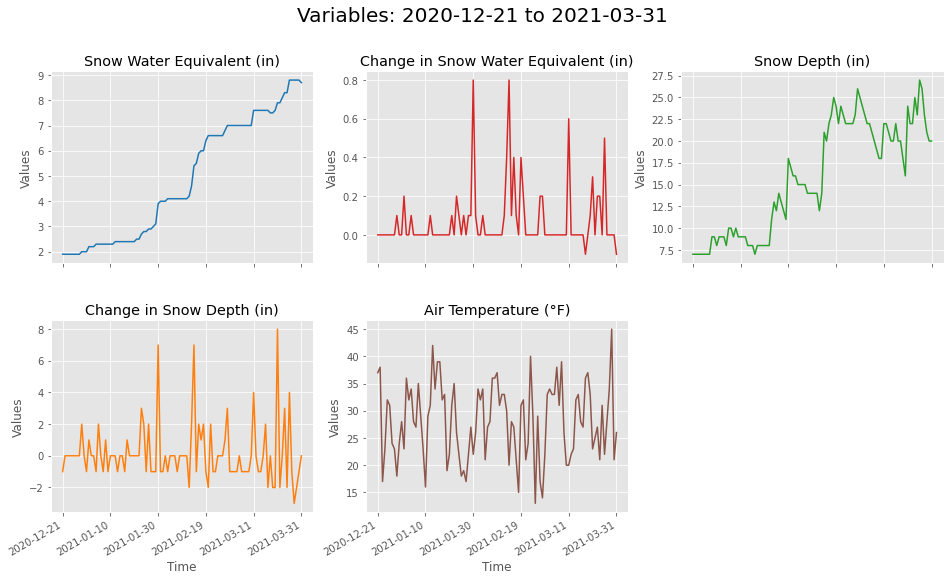

In [105]:
# Setting up figure
begin = df_site['Date'][0]
end = df_site['Date'][num_days]
fig, axs = plt.subplots(2, 3, figsize=(16,9))
fig.delaxes(axs[1,2])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
fig.suptitle('Variables: %s to %s' % (begin, end) , fontsize=20)

# Defining plot function
def plot(y, title, xlabel, ylabel, ax1, ax2, color):
    axs[ax1,ax2].plot(dates, y, c=color)
    axs[ax1,ax2].set_xlabel(xlabel)
    axs[ax1,ax2].set_ylabel(ylabel)
    axs[ax1,ax2].set_title(title)
    #axs[ax1,ax2].set_ylim([ymin, ymax])
    axs[ax1,ax2].set_xticks(np.arange(0, len(x)+1, (len(dates)-1)/5))
    #axs[ax1,ax2].set_yticks(np.arange(math.floor(float(min(y))), math.ceil(float(max(y))), 1.5))
    plt.gcf().autofmt_xdate()
   
    
# Plotting variables    
plot(snow_water_equivalent, 'Snow Water Equivalent (in)', 'Time', 'Values', 0, 0, 'tab:blue')
plot(change_snow_water_equivalent, 'Change in Snow Water Equivalent (in)', 'Time', 'Values', 0, 1, 'tab:red')
plot(snow_depth, 'Snow Depth (in)', 'Time', 'Values', 0, 2, 'tab:green')
plot(change_snow_depth, 'Change in Snow Depth (in)', 'Time', 'Values', 1, 0, 'tab:orange')
plot(air_temp, 'Air Temperature (°F)', 'Time', 'Values', 1, 1, 'tab:brown')

# ====== To Do ======
# Wrap our variables into an array so we can use add_subplot and a loop (removes redundant code)

In [106]:
snow_water_equivalent

0      1.9
1      1.9
2      1.9
3      1.9
4      1.9
      ... 
96     8.8
97     8.8
98     8.8
99     8.8
100    8.7
Name: Snow Water Equivalent (in), Length: 101, dtype: float64

In [109]:
%store dates
%store snow_water_equivalent
%store change_snow_water_equivalent
%store snow_depth
%store change_snow_depth
%store air_temp

Stored 'dates' (Series)
Stored 'snow_water_equivalent' (Series)
Stored 'change_snow_water_equivalent' (Series)
Stored 'snow_depth' (Series)
Stored 'change_snow_depth' (Series)
Stored 'air_temp' (Series)
